## Objective: Detecting and Dealing with Outliers

### The dataset is taken from: : https://www.kaggle.com/
The dataset contains the following features-
1. Age : Age of the patient
2. Sex : Sex of the patient
3. exang: exercise induced angina (1 = yes; 0 = no)
4. ca: number of major vessels (0-3)
5. cp : Chest Pain type chest pain type
Value 1: typical angina,
Value 2: atypical angina,
Value 3: non-anginal pain,
Value 4: asymptomatic
6. trtbps : resting blood pressure (in mm Hg)
7. chol : cholestoral in mg/dl fetched via BMI sensor
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
9. rest_ecg : resting electrocardiographic results
Value 0: normal,
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
10. thalach: maximum heart rate achieved
11. output: 0= less chance of heart attack 1= more chance of heart attack

### Table of contents
#### 1.Importing libraries
#### 2. Loading the dataset
#### 3. Detection and Dealing with outliers of feature 'age'
#### 4. Detection and Dealing with outliers of feature 'chol'
#### 5.Detection and Dealing with outliers of feature 'thalachh'
#### 6. Inferences and Conclusion

<h3><font color="blue"> 1. Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import LocalOutlierFactor


<h3><font color="blue"> 2. Loading the dataset

In [2]:
df= pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
print(df.shape)

(303, 14)


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There is no missing value in the data 

<h3><font color="blue"> 3. Feature "age"

<h3><font color="blue"> 3.1 Detection of outliers

###  EDA on Age

### Histogram

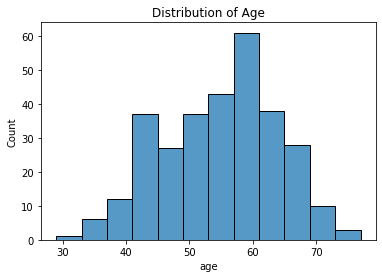

In [6]:
sns.histplot(data= df, x= "age")
plt.title("Distribution of Age")

plt.show()

### Scatter Plot

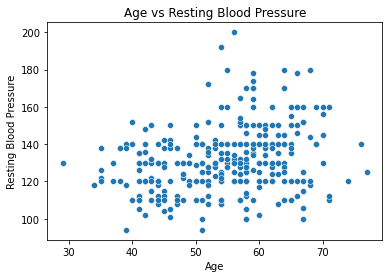

In [7]:
sns.scatterplot(x= "age",y="trtbps",data= df)
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("Age vs Resting Blood Pressure")
plt.show()

#### Many outliers can be observed from the scatter plot and histogram. So it is important to remove them

<h3><font color="blue"> 3.2. Dealing with outliers

###  Standard Deviation Method

In [8]:
lower_limit= np.mean(df["age"])-3*(df["age"]).std()
print("lower limit=",lower_limit)


lower limit= 27.12003366414979


In [9]:
upper_limit= np.mean(df["age"])+3*(df["age"]).std()
print("upper limit=",upper_limit)


upper limit= 81.61263960317694


In [10]:
array= np.array(df["age"])
count= 0
for i in array:
    if i< lower_limit:
        count+=1
        
    else:
        continue
print("number of outliers below -3 standard deviation are", count)

number of outliers below -3 standard deviation are 0


In [11]:
array= np.array(df["age"])
count= 0
for i in array:
    if i>upper_limit:
        count+=1
        
    else:
        continue
print("number of outliers above +3 standard deviation are", count)


number of outliers above +3 standard deviation are 0


#### I have found no outliers beyond the range of +3 standard deviation and -3 standard deviation. But my scatter plot is showing the presence of outliers. So I want to modify my upper limit and lower limit, and then check.

In [12]:
lower_limit1= np.mean(df["age"])-2*(df["age"]).std()
print("lower limit=",lower_limit1)

lower limit= 36.20213465398765


In [13]:
upper_limit1= np.mean(df["age"])+2*(df["age"]).std()
print("upper limit=",upper_limit1)

upper limit= 72.53053861333908


In [14]:
array= np.array(df["age"])
count= 0
for i in array:
    if i< lower_limit1:
        count+=1
        
    else:
        continue 
print("number of outliers below -2 standard deviation are", count)

number of outliers below -2 standard deviation are 7


In [15]:
array= np.array(df["age"])
count= 0
for i in array:
    if i>upper_limit1:
        count+=1
        
    else:
        continue
print("number of outliers above +2 standard deviation are", count)

number of outliers above +2 standard deviation are 3


#### After modifying my threshold values, I have found 7 outliers below -2 standard deviation and 3 outliers above +2 standard devation. Now I will remove them and plot my data.

In [16]:
df1= df[(df["age"]> lower_limit1) & (df["age"]< upper_limit1)]
print(df1["age"])

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 293, dtype: int64


In [17]:
LIST= list(df1["age"])
LIST.sort()
#print(LIST)
x_lower_limit= LIST[0]
print(x_lower_limit)
x_upper_limit= LIST[len(LIST)-1]
print(x_upper_limit)

37
71


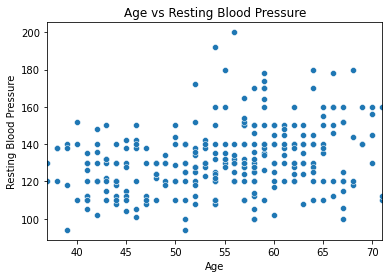

In [18]:
sns.scatterplot(x= "age", y= 'trtbps', data= df1)
plt.xlim(x_lower_limit,x_upper_limit)
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("Age vs Resting Blood Pressure")
plt.show()

#### The outliers are now removed. 

<h3><font color="blue"> 4. Feature "chol"

<h3><font color="blue"> 4.1 Detection of outliers

### EDA on chol

<h3> Scatter Plot

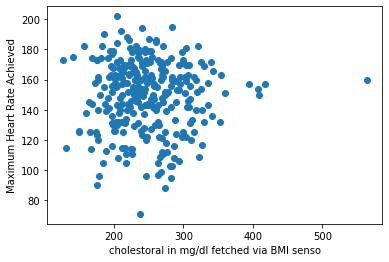

In [19]:
plt.scatter(x= "chol", y="thalachh",data= df)
plt.xlabel("cholestoral in mg/dl fetched via BMI senso")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

### Histogram

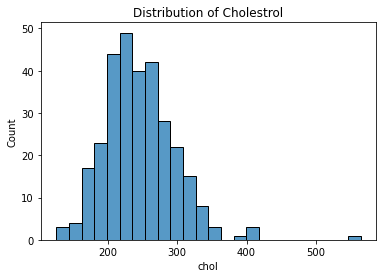

In [20]:
sns.histplot(data= df, x= "chol")
plt.title("Distribution of Cholestrol")
plt.show()

### Boxplot

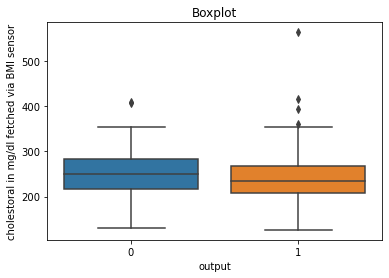

In [21]:

sns.boxplot(x="output",y="chol",data=df)
plt.ylabel("cholestoral in mg/dl fetched via BMI sensor")
plt.xlabel("output")
plt.title("Boxplot")
plt.show()

#### Outliers can be observed from the histogram and box plot.

### Distribution of Cholestrol

Text(0.5, 1.0, 'Probability Density Function')

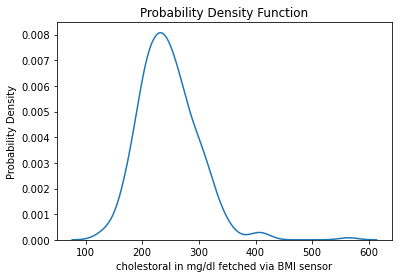

In [22]:
data = df["chol"]
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )
 
sns.distplot(data, pdf)
plt.xlabel('cholestoral in mg/dl fetched via BMI sensor')
plt.ylabel('Probability Density')
plt.title("Probability Density Function")

#### Tailedness can be observed from the distribution of data due to the outliers.

### Using Z score to detect outliers

In [23]:
Z_SCORE=[]
MEAN= np.mean(df["chol"])
STD= np.std(df["chol"])
for i in df["chol"]:
    z= (i- MEAN)/ STD
    Z_SCORE.append(z)



In [24]:
threshold= 3
for i in range(len(Z_SCORE)):
    if Z_SCORE[i]>threshold:
        print(Z_SCORE[i])
       


3.299555035849752
6.1404009340536785
3.1063002128426818
3.1449511774440957


<h3><font color="blue"> 4.2 Dealing with outliers

### Replacing the outliers with Null value

In [25]:
#https://www.askpython.com/python/examples/detection-removal-outliers-in-python

In [26]:
for i in ["chol"]:
    Q1,Q3 = np.percentile(df.loc[:,i],[25,75])
    IQR = Q3-Q1
    upper_boundary = Q3+(1.5*IQR)
    lower_boundary = Q1-(1.5*IQR)
    df.loc[df[i] < lower_boundary,i] = np.nan
    df.loc[df[i] > upper_boundary,i] = np.nan

In [27]:
df["chol"].isnull().sum()

5

#### There are 5 outliers beyond the 1st quartile and 3rd quartile range. These are replaced by null values.

### Imputation with mean value

In [28]:
#https://www.askpython.com/python/examples/impute-missing-data-values

In [29]:
column = ['chol']
for i in column:
    df.loc[df.loc[:,i].isnull(),i]= df.loc[:,i].mean()
df["chol"].isnull().sum()

0

#### Since the null values are now replaced with the mean value, there is no missing value in the feature "chol".

### Distribution of chol after removiing outliers

Text(0.5, 1.0, 'Probability Density Function')

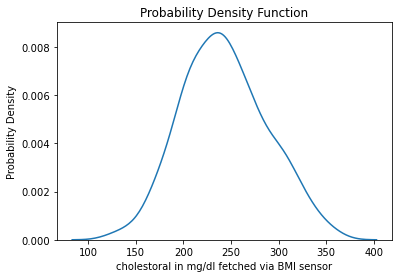

In [30]:
data = df["chol"]
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )
 
sns.distplot(data, pdf)
plt.xlabel('cholestoral in mg/dl fetched via BMI sensor')
plt.ylabel('Probability Density')
plt.title("Probability Density Function")

#### The tailedness of the distribution can no longer be seen after removal of outliers. 

<h3><font color="blue"> 5. Feature "thalachh"

<h3><font color="blue"> 5.1 Detection of outliers

### EDA on thalachh

### Histogram

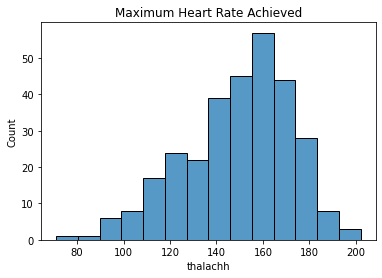

In [31]:
sns.histplot(x= "thalachh", data= df)
plt.title("Maximum Heart Rate Achieved")
plt.show()

### Scatter Plot

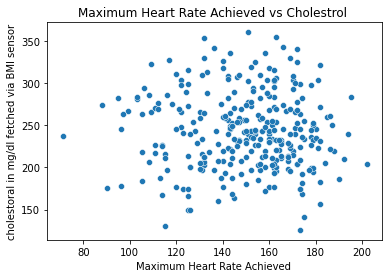

In [32]:
sns.scatterplot(x= "thalachh", y= 'chol', data= df)
plt.xlabel("Maximum Heart Rate Achieved ")
plt.ylabel("cholestoral in mg/dl fetched via BMI sensor")
plt.title("Maximum Heart Rate Achieved vs Cholestrol ")
plt.show()

#### Outliers can be observed from the plot.

### Inter Quartile Range

In [33]:
Q1= df.thalachh.quantile(.25)
print(Q1)
Q3= df.thalachh.quantile(.75)
print(Q3)

133.5
166.0


In [34]:
IQR= Q3-Q1
print(IQR)

32.5


In [35]:
Q1-1.5 * IQR

84.75

In [36]:
Q3 + 1.5 * IQR

214.75

In [37]:
count= 0
a= np.array(df["thalachh"])
for i in a:
    if i< 84.75:
        count+=1
        
    
print("no. of outliers below lower boundary =",count)

no. of outliers below lower boundary = 1


In [38]:
count= 0
b= np.array(df["thalachh"])
for i in b:
    if i> 214.75:
        count+=1

print("no. of outliers above upper boundary=",count)

no. of outliers above upper boundary= 0


#### Implementation of Inter Quartile Range has helped to find the outliers below the first quartile and above the third quartile.

### Local outlier Factor

In [39]:
#reference: https://medium.com/mlpoint/local-outlier-factor-a-way-to-detect-outliers-dde335d77e1a

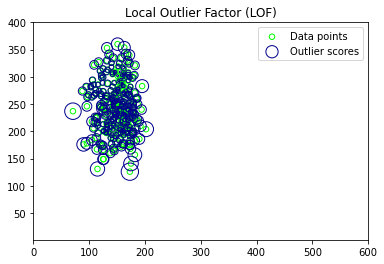

In [41]:
a = list(df['thalachh'])
b = list(df['chol'])
Z=np.array([a,b])
L=Z.T
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(L)
X_scores = clf.negative_outlier_factor_
plt.title("Local Outlier Factor (LOF)")
plt.scatter(a,b, edgecolor='lime', s=30, label='Data points',facecolors='none')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(a,b, s=300 * radius, edgecolors='darkblue',facecolors='none', label='Outlier scores')
plt.xlim((0, 600))
plt.ylim((1, 400))
legend = plt.legend(loc='upper right')
plt.show()

#### Outliers can be clearly spotted from LOF 

<h3><font color="blue"> 5.2 Dealing with outliers

### Replacing Outliers with Null value

In [42]:

for i in ["thalachh"]:
    Q1,Q3 = np.percentile(df.loc[:,i],[25,75])
    IQR = Q3-Q1
    upper_boundary = Q3+(1.5*IQR)
    lower_boundary = Q1-(1.5*IQR)
    df.loc[df[i] < lower_boundary,i] = np.nan
    df.loc[df[i] > upper_boundary,i] = np.nan

In [43]:
df["thalachh"].isnull().sum()

1

#### There is only one outlier which is replaced by null value.

### Dropping the row containing missing value

In [44]:
df=df.dropna(axis=0)

In [45]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [46]:
print(df.shape)

(302, 14)


#### The number of rows of the dataset gets reduced after removing the row containing the null value.

[]

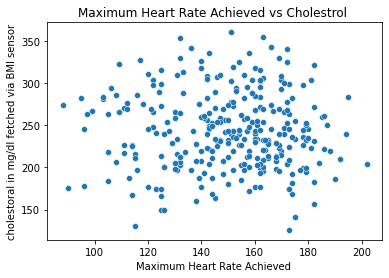

In [47]:
sns.scatterplot(x="thalachh",y="chol",data= df)
plt.xlabel("Maximum Heart Rate Achieved ")
plt.ylabel("cholestoral in mg/dl fetched via BMI sensor")
plt.title("Maximum Heart Rate Achieved vs Cholestrol ")
plt.plot()

#### The outliers from the feature "thalachh" are removed.

<h3><font color="blue"> 6. Inferences and Conclusion

1. There are many methods to find outliers in data.
2. Outliers can be visually spotted from plots like histogram, scatterplot and boxplot.
3. They cause skewness in the data and also cause bias.
4. They can affect the overall data and so, sometimes they are preferred to be removed.
5. Removing many rows containing outliers can sometimes lead to loss of information that can be valuable for the data.
